In [5]:
import numpy as np 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import cv2
import sys 

import torch 
from google.colab import drive 
from google.colab.patches import cv2_imshow

In [2]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 10029, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 10029 (delta 3), reused 9 (delta 3), pack-reused 10017
Receiving objects: 100% (10029/10029), 9.36 MiB | 28.68 MiB/s, done.
Resolving deltas: 100% (6761/6761), done.
     |████████████████████████████████| 596 kB 30.3 MB/s 
     |████████████████████████████████| 1.8 MB 62.7 MB/s 
     |████████████████████████████████| 153 kB 62.7 MB/s 
     |████████████████████████████████| 181 kB 42.3 MB/s 
     |████████████████████████████████| 63 kB 474 kB/s 


In [6]:
def show_version():
    print("========Version========")
    print(f"numpy : {np.__version__}")
    print(f"torch : {torch.__version__}")
    print(f"cv2 : {cv2.__version__}")
    print(f"python {sys.version}")

In [7]:
show_version()

========Version========
numpy : 1.21.6
torch : 1.12.0+cu113
cv2 : 4.6.0
python 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]


In [8]:
from IPython.display import Image, clear_output  
import torch

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.12.0+cu113 (CPU)


In [10]:
!cat yolov3/requirements.txt
!cd yolov3/data/images;ls -lia

# pip install -r requirements.txt

# Base ----------------------------------------
matplotlib>=3.2.2
numpy>=1.18.5
opencv-python>=4.1.2
Pillow>=7.1.2
PyYAML>=5.3.1
requests>=2.23.0
scipy>=1.4.1
torch>=1.7.0
torchvision>=0.8.1
tqdm>=4.41.0

# Logging -------------------------------------
tensorboard>=2.4.1
wandb

# Plotting ------------------------------------
pandas>=1.1.4
seaborn>=0.11.0

# Export --------------------------------------
# coremltools>=4.1  # CoreML export
# onnx>=1.9.0  # ONNX export
# onnx-simplifier>=0.3.6  # ONNX simplifier
# scikit-learn==0.19.2  # CoreML quantization
# tensorflow>=2.4.1  # TFLite export
# tensorflowjs>=3.9.0  # TF.js export

# Extras --------------------------------------
# albumentations>=1.0.3
# Cython  # for pycocotools https://github.com/cocodataset/cocoapi/issues/172
# pycocotools>=2.0  # COCO mAP
# roboflow
thop  # FLOPs computation
total 656
4063423 drwxr-xr-x 2 root root   4096 Jul 22 01:25 .
4063411 drwxr-xr-x 5 root root   4096 Jul 22 01

In [11]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.0+cu113 CPU

100% 119M/119M [00:02<00:00, 50.4MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (2.057s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (1.575s)
Speed: 2.1ms pre-process, 1815.8ms inference, 12.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [13]:

!ls -lia ./yolov3/runs/detect/exp

total 744
4063562 drwxr-xr-x 2 root root   4096 Jul 22 01:30 .
4063561 drwxr-xr-x 4 root root   4096 Jul 22 01:31 ..
4063567 -rw-r--r-- 1 root root 494823 Jul 22 01:30 bus.jpg
4063568 -rw-r--r-- 1 root root 254735 Jul 22 01:30 zidane.jpg


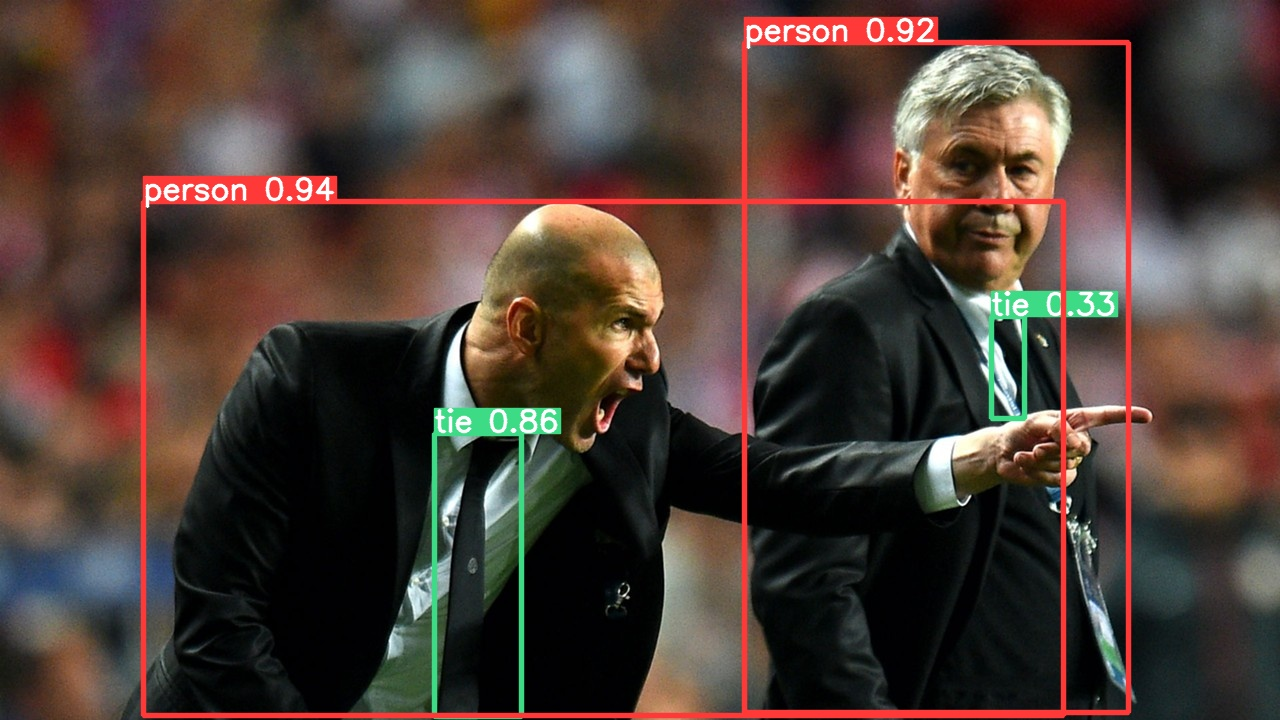

In [14]:
from IPython.display import Image, clear_output 

Image(filename='yolov3/runs/detect/exp/zidane.jpg', width=600)

In [26]:
!mkdir /content/data
!wget -O /content/data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
!wget -O ./data/seoul.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Gangnam_Seoul_January_2009.jpg/1280px-Gangnam_Seoul_January_2009.jpg
!wget -O ./data/intersection.jpg https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/202205/MIT_Eco-Driving-01_0.jpg?itok=tHw5dBk-

mkdir: cannot create directory ‘/content/data’: File exists
--2022-07-22 01:43:40--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘/content/data/beatles01.jpg’

/content/data/beatl 100%[===================>] 374.14K  --.-KB/s    in 0.003s  

2022-07-22 01:43:40 (120 MB/s) - ‘/content/data/beatles01.jpg’ saved [383118/383118]

--2022-07-22 01:43:40--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443..

In [27]:
# !cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --soruce /content/data/beatels01.jpg \
#                             --project /content/data --name=run_image --exist-ok --line-thickness 1 

!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/baseball01.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/baseball01.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/baseball01.jpg: 416x640 3 persons, 1 sports ball, 1 baseball bat, 1 baseball glove, Done. (1.721s)
Speed: 2.4ms pre-process, 1720.6ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image


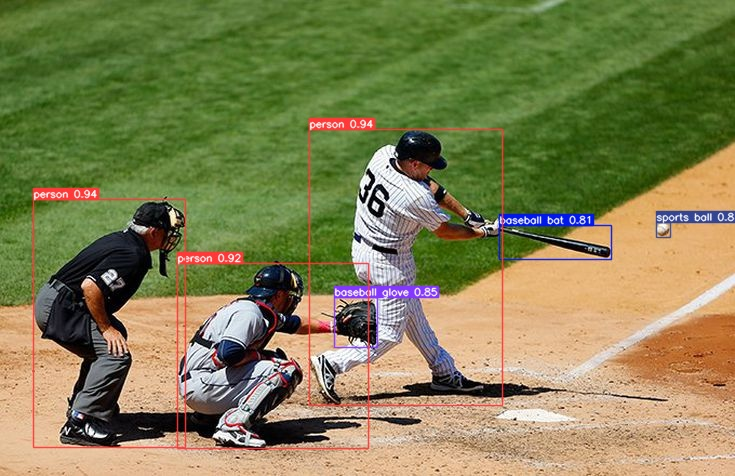

In [28]:
Image(filename='/content/data/run_image/baseball01.jpg', width=600)

In [ ]:

!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/seoul.jpg  \
                            --project /content/data  --name=run_image --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/seoul.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_image, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-21-g92c3bd7 torch 1.12.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/data/seoul.jpg: 352x640 3 persons, 17 cars, 3 buss, 2 traffic lights, Done. (1.450s)
Speed: 1.8ms pre-process, 1449.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_image
